# Create RiverFlood Hazard object from netCDF file

In [1]:
from climada_petals.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
import pandas as pd

/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 8.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
# Choices
val = 10000
lon = 1.05
lat = 49.35
loc_bounds = (lon-0.2,lat-0.2,lon+0.2,lat+0.2) #lon_min, lat_min, lon_max, lat_max
myloc = Centroids.from_pnt_bounds(loc_bounds, res=0.02, crs='EPSG:4326')
n_year_hist = range(1970,1980)
n_year_fut = range(2040,2050)
#hist: 1861 to 2006 (0 to 145)
#others: 2006 to 2100 (0 to 94)

In [3]:
# RiverFlood hazard file source
# source: https://files.isimip.org/cama-flood/results/
# Remark: precision = 150 arcsec = 0.04 degree = 2 to 4 km
dph_choice = ['../Climada_Data/flddph_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
frc_choice = ['../Climada_Data/fldfrc_150arcsec_clm50_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_clm45_gfdl-esm2m_0_rcp85.nc']
#dph_choice = ['../Climada_Data/flddph_150arcsec_cwatm_gfdl-esm2m_0_hist.nc','../Climada_Data/flddph_150arcsec_cwatm_gfdl-esm2m_0_rcp26.nc','../Climada_Data/flddph_150arcsec_cwatm_gfdl-esm2m_0_rcp60.nc','../Climada_Data/flddph_150arcsec_cwatm_gfdl-esm2m_0_rcp85.nc']
#frc_choice = ['../Climada_Data/fldfrc_150arcsec_cwatm_gfdl-esm2m_0_hist.nc','../Climada_Data/fldfrc_150arcsec_cwatm_gfdl-esm2m_0_rcp26.nc','../Climada_Data/fldfrc_150arcsec_cwatm_gfdl-esm2m_0_rcp60.nc','../Climada_Data/fldfrc_150arcsec_cwatm_gfdl-esm2m_0_rcp85.nc']


In [4]:
# generating RiverFlood hazard from netCDF file
#rf_hist = RiverFlood.from_nc(centroids = myloc, years=n_year_hist, dph_path=dph_choice[0], frc_path=frc_choice[0])
rf_rcp26 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[1], frc_path=frc_choice[1])
#rf_rcp60 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[2], frc_path=frc_choice[2])
rf_rcp85 = RiverFlood.from_nc(centroids = myloc, years=n_year_fut, dph_path=dph_choice[3], frc_path=frc_choice[3])
#rf_hist.event_name 


<GeoAxes: title={'center': 'RF max intensity at each point'}>

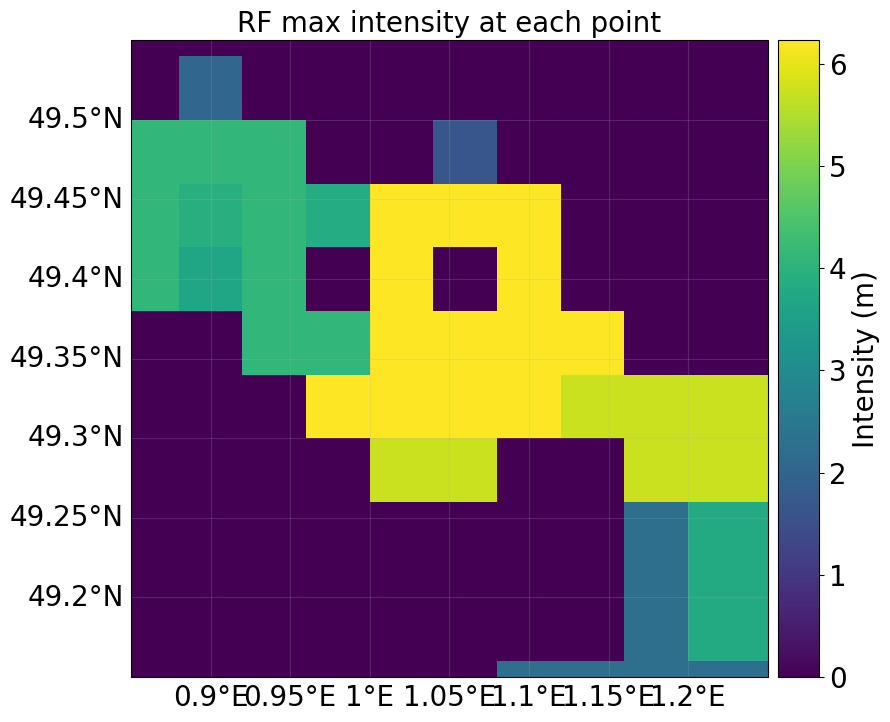

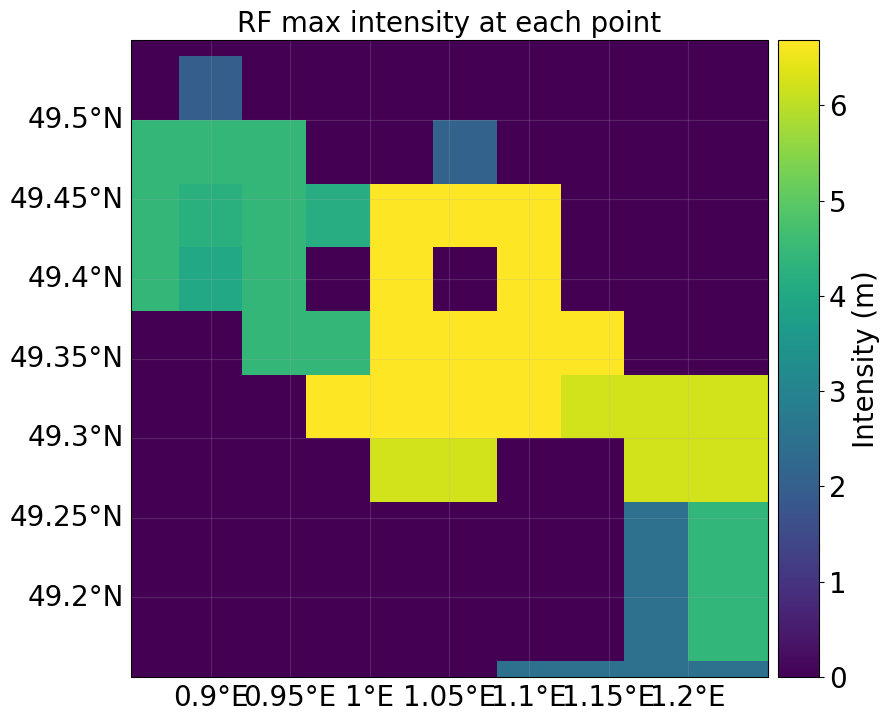

In [5]:
# plotting intensity (Flood depth in m)
#rf_hist.plot_intensity(event=0, smooth = False) 
rf_rcp26.plot_intensity(event=0, smooth = False) 
#rf_rcp60.plot_intensity(event=0, smooth = False)  
rf_rcp85.plot_intensity(event=0, smooth = False) 
#event 0 is the max over the selected years

<GeoAxes: title={'center': 'RF max intensity at each point'}>

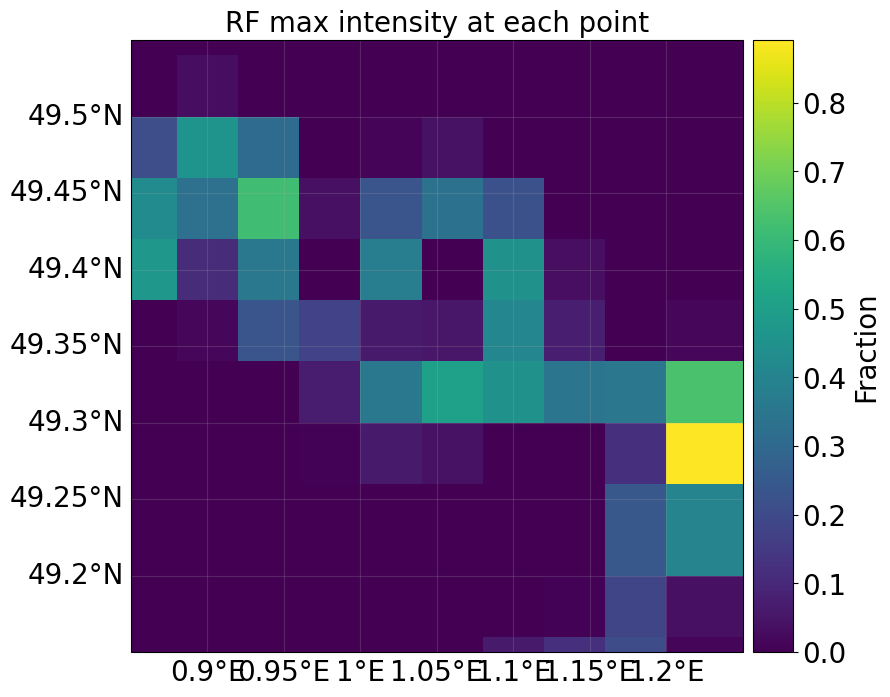

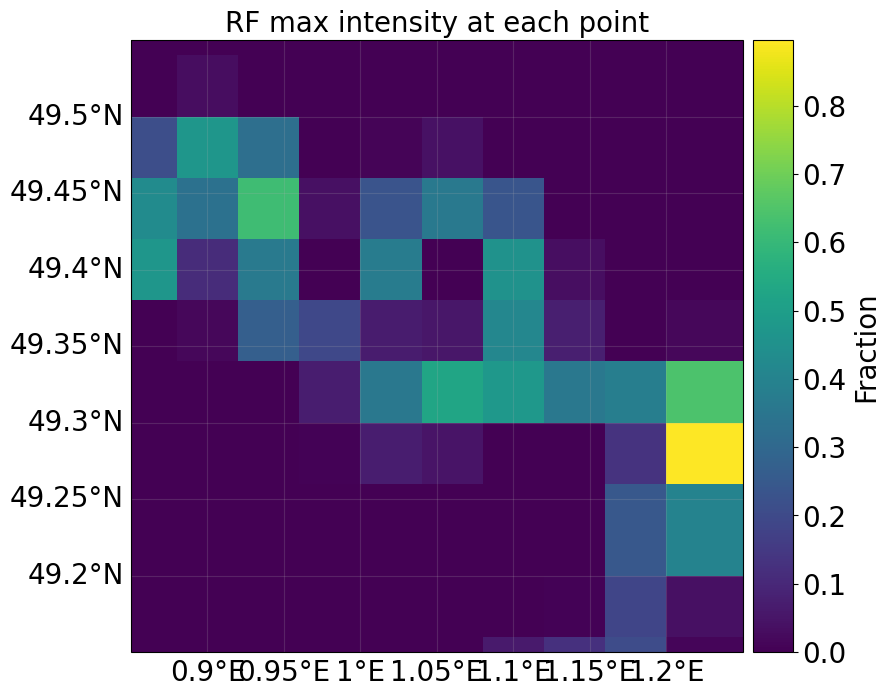

In [6]:
# plotting fraction flooded
#rf_hist.plot_fraction(event=0, smooth = False)
rf_rcp26.plot_fraction(event=0, smooth = False)
#rf_rcp60.plot_fraction(event=0, smooth = False)
rf_rcp85.plot_fraction(event=0, smooth = False)
#event 0 is the max over the selected years

In [7]:
# calculating flooded area
#rf_hist.set_flooded_area()
rf_rcp26.set_flooded_area()
#rf_rcp60.set_flooded_area()
rf_rcp85.set_flooded_area()

#print("Total yearly-average flooded area with hist scenario in lon " + str(lon) + " and lat " + str(lat) + ":")
#print(str(rf_hist.fla_ann_av) + " m2")

print("Total yearly-average flooded area with rcp26 scenario in lon " + str(lon) + " and lat " + str(lat) + ":")
print(str(rf_rcp26.fla_ann_av) + " m2")

#print("Total yearly-average flooded area with rcp60 scenario in lon " + str(lon) + " and lat " + str(lat) + ":")
#print(str(rf_rcp60.fla_ann_av) + " m2")

print("Total yearly-average flooded area with rcp85 scenario in lon " + str(lon) + " and lat " + str(lat) + ":")
print(str(rf_rcp85.fla_ann_av) + " m2")

Total yearly-average flooded area with rcp26 scenario in lon 1.05 and lat 49.35:
124994358.59829983 m2
Total yearly-average flooded area with rcp85 scenario in lon 1.05 and lat 49.35:
118619685.31662495 m2


/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/hazard/centroids/centr.py:873: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xy_pixels = self.geometry.buffer(res / 2).envelope


# Deriving flood impact with hazard, impact function and exposure 

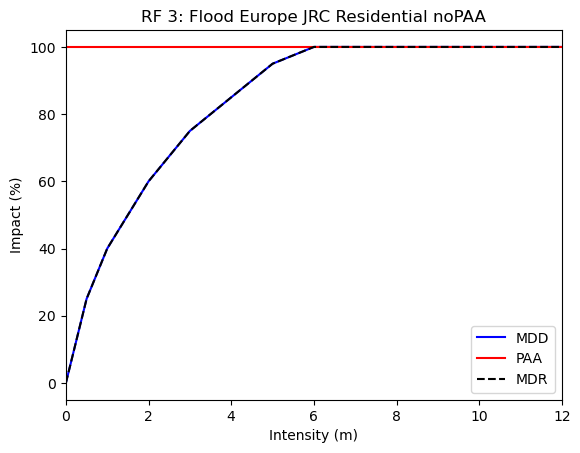

In [8]:
# setting JRC damage functions
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
impf_set = flood_imp_func_set()
impf_reg = impf_set.get_func(fun_id=3)
axes = impf_reg[0].plot()

In [9]:
# create exposure object
from climada.entity.exposures.base import Exposures
from geopandas import GeoDataFrame
exp_test = Exposures()
d = {'value': [val], 'latitude': [lat], 'longitude': [lon], 'impf_': [3]}
exp_test.gdf = GeoDataFrame(d)
exp_test.set_geometry_points()
#print(exp_test.vars_oblig)
#print(exp_test.__dict__)
#print(dir(exp_test))
print(exp_test.gdf)

   value  latitude  longitude  impf_                  geometry
0  10000     49.35       1.05      3  POINT (1.05000 49.35000)


/Users/arnaudgoussebaile/miniconda3/envs/climada_env/lib/python3.9/site-packages/climada/util/coordinates.py:2746: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  df_val['geometry'] = gpd.GeoSeries(


In [11]:
# compute impact
from climada.engine.impact_calc import ImpactCalc
#method ImpactCalc.impact() similar as climada.engine.impact.Impact
#see https://climada-python.readthedocs.io/en/stable/climada/climada.engine.html

imp_rcp26 = ImpactCalc(exp_test,impf_set,rf_rcp26)
impact_rcp26 = imp_rcp26.impact()
print(impact_rcp26.at_event)
print(impact_rcp26.eai_exp)
print(impact_rcp26.aai_agg)

imp_rcp85 = ImpactCalc(exp_test,impf_set,rf_rcp85)
impact_rcp85 = imp_rcp85.impact()
print(impact_rcp85.at_event)
print(impact_rcp85.eai_exp)
print(impact_rcp85.aai_agg)

[457.80049886 543.99996996 426.42998057 388.6795535  389.10209567
 532.46331136 432.99090474 540.94942005 543.99996996 397.71040742]
[465.41261121]
465.41261120849134
[391.36760572 387.41260792 402.50319394 390.25606632 526.23989175
 543.99996996 492.00587646 387.41278302 460.28253608 485.56745365]
[446.70479848]
446.7047984827233
